# Esame di Metodi Numerici - 6 Luglio 2023

##                             Turno I  ore 9-11.30


## Esercizio 1


Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. Risolvere i 3 sistemi lineari aventi ciascuno di essi come matrice dei coefficienti A1 e termine noto b1, A2 e termine noto b2, A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.
Verificare se le matrici sono malcondizionate, dire teoricamente cosa questo implica e verificarlo sperimentalmente almeno per una di esse.


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_I.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [48]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import SolveTriangular
import matplotlib.pyplot as plt
import scipy.linalg as spl

dati = loadmat('Test_I.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
A3=dati["A3"]
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)

matrice A1 di dimensioni 10x10
matrice A1 densa
matrice A1 simmetrica
matrice A1 non definita positiva


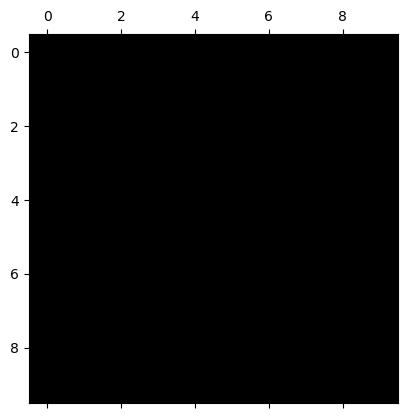

In [35]:
# Studio la matrice A1 per comprendere che metodo utilizzare
m,n = A1.shape
print(f'matrice A1 di dimensioni {m}x{n}')
if np.count_nonzero(A1)*100/(m*n) < 33:
    print('matrice A1 sparsa')
else: print('matrice A1 densa')
if np.all(A1 == A1.T):
    print("matrice A1 simmetrica")
    if np.all(npl.eigvals(A1)>0): 
        print("matrice A1 definita positiva")
    else: print("matrice A1 non definita positiva")
else: print("matrice A1 non simmetrica")

plt.spy(A1)

In [36]:
# A1 è piccola, densa e simmetrica => o Gauss o QR
# per QR, mal condizionata
print(f'A1 è ben condizionata? {npl.cond(A1) < 100}')

A1 è ben condizionata? False


In [37]:
# uso QR
def QR(A, b): 
    Q, R = npl.qr(A)
    x, flag = SolveTriangular.Usolve(R, Q.T @ b)
    return x, flag

In [38]:
x1, flag1 = QR(A1, b1)
print(f'Soluzione x1 = {x1}')

Soluzione x1 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


matrice A1 di dimensioni 25x10
matrice A2 densa
matrice A2 non simmetrica


C:\Users\lisav\AppData\Local\Temp\ipykernel_23344\3086435400.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(A2 == A2.T):


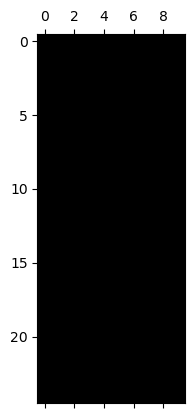

In [41]:
# Studio la matrice A2 per comprendere che metodo utilizzare
m,n = A2.shape
print(f'matrice A1 di dimensioni {m}x{n}')
if np.count_nonzero(A2)*100/(m*n) < 33:
    print('matrice A2 sparsa')
else: print('matrice A2 densa')
if np.all(A2 == A2.T):
    print("matrice A2 simmetrica")
    if np.all(npl.eigvals(A2)>0): 
        print("matrice A2 definita positiva")
    else: print("matrice A2 non definita positiva")
else: print("matrice A2 non simmetrica")
plt.spy(A2)

In [47]:
# matrice A2 rettangolare, densa e non simmetrica
# per capire che metodo applicare, studio il condizionamento di A2
print(f'A2 è mal condizionata = {npl.cond(A2) > 10^4}') # altamente mal condizionata

A2 è mal condizionata = True


In [52]:
# QRLS 
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=spl.qr(A)
    h = Q.T @ b
    x,flag=SolveTriangular.Usolve(R[0:n][0:n], h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x2, residuo2 = qrLS(A2, b2)
print(f'Soluzione x2 = {x2}')

Soluzione x2 = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


matrice A3 di dimensioni 225x225
matrice A3 sparsa
matrice A3 simmetrica
matrice A3 definita positiva


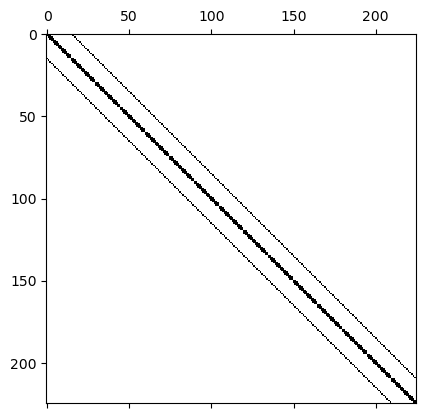

In [42]:
# Studio la matrice A3 per comprendere che metodo utilizzare
m,n = A3.shape
print(f'matrice A3 di dimensioni {m}x{n}')
if np.count_nonzero(A3)*100/(m*n) < 33:
    print('matrice A3 sparsa')
else: print('matrice A3 densa')
if np.all(A3 == A3.T):
    print("matrice A3 simmetrica")
    if np.all(npl.eigvals(A3)>0): 
        print("matrice A3 definita positiva")
    else: print("matrice A3 non definita positiva")
else: print("matrice A3 non simmetrica")

plt.spy(A3)

In [55]:
# uso metodi di discesa (simmetrica e definita positiva)

def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
   # inizializzare le variabili necessarie
    x = x0     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)

    while errore >= tol and it < itmax:
        it=it+1
        Ap = A@p       
        alpha = -(r.T @ p) / (p.T @ Ap)
        x = x + alpha * p
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r

    return x,vet_r,vec_sol,it
x0 = np.array([0]*n).T
itmax = 400
tol = 1e-6 

x3, vet_r3, vec_sol3, it3 = steepestdescent(A3,b3,x0,itmax,tol)
print(f'soluzione x3 = {x3}, ottenuta in {it3} iterazioni')

soluzione x3 = [[0.99997516 0.99997516 0.99997516 ... 0.99997516 0.99997516 0.99997516]
 [0.9999522  0.9999522  0.9999522  ... 0.9999522  0.9999522  0.9999522 ]
 [0.99992926 0.99992926 0.99992926 ... 0.99992926 0.99992926 0.99992926]
 ...
 [0.99992926 0.99992926 0.99992926 ... 0.99992926 0.99992926 0.99992926]
 [0.9999522  0.9999522  0.9999522  ... 0.9999522  0.9999522  0.9999522 ]
 [0.99997516 0.99997516 0.99997516 ... 0.99997516 0.99997516 0.99997516]], ottenuta in 400 iterazioni


# Esercizio 2

Data l'equazione di 2° grado $$\frac{1}{2} x^2+2bx-c=0$$

con $b=10^8, c=2^{-i},i=-5,\cdots, 9$

a) Scrivere le due formule algebriche per ricavare i valori delle 2 soluzioni

                                                                                    1 punto

In [6]:
import numpy as np

In [15]:
b = 1e8 * 2
c = np.zeros(100)
a = 1/2

for i in range(-5, 9):
    c[i] = -2*(-i) 

x1 = -b + np.sqrt(b**2 - 4 * a * c)
x2 = -b - np.sqrt(b**2 - 4 * a * c) 
print(f'soluzione x1 = {x1}, \nsoluzione x2 = {x2}')

soluzione x1 = [ 0.00000000e+00  0.00000000e+00 -2.98023224e-08 -2.98023224e-08
 -2.98023224e-08 -2.98023224e-08 -5.96046448e-08 -8.94069672e-08
 -8.94069672e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.000000

b) Studiare l'indice di condizionamento delle 2 formule algebriche, facendo uso del risultato teorico visto a lezione riguardo l'indice di condizionamento della valutazione di una funzione. (Spiegare il significato di problema mal condizionato) e dire quale delle due formule è malcondizionata. Per quali valori di $c$ il problema risulterebbe ben condizionato?

                                                                                    5 punti

Innanzitutto, definiamo problema mal condizionato un problema in cui piccole perturbazioni sui dati si amplificano in maniera significativa.

Nel caso in cui una delle due formule risulti mal condizionata, proporre una soluzione algebricamente equivalente che non sia malcondizionata.

                                                                                    3 punti

## Domanda intelligenza artificiale

- Limiti delle reti MLP (multilayer Perceptron) ed introduzione delle Reti neurali Convoluzionali. 
- Architettura di una rete neurale convoluzionale: strati convoluzionali, attivazione non lineare e pooling + parte fully connected.
- Loss function per il task della regressione.  Training di una rete. 
- Cenni sull'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi ditutti i layer .
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch.
                                                                                [7  punti]
